In [955]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import itertools
import random


class WebPages:  
    
    def __init__(self, N=7, incidence=None, edges=None, simple=True):
        self.N = N
        
        if edges == None:
            edges = self.N
        else: 
            edges = min(edges, self.N*(self.N -1))
        
        if type(incidence) != type(None):
            self.incidence = incidence
        elif simple:
            self.incidence = self.random_edges_simple(edges)
        else:
            self.incidence = self.random_edges(edges)
        
    def random_tree(self):
        
        matrix = matrix = np.zeros((self.N, self.N), dtype=int)
        source = list(range(self.N))
        random.shuffle(source)
        root = source.pop()
        dest = [root]
        while source:
            d = random.choice(dest)
            s = source.pop()
            matrix[d, s] = 1
            dest.append(s)
        return matrix, root

    
    def random_edges_simple(self, edges):
        
        matrix, root = self.random_tree()
        
        roots = {root}
        while True:
            A = matrix.copy()
            for k in range(self.N):
                A  += np.dot(A, matrix)

            leaves = list(np.flatnonzero(np.sum(A, axis=1) == 0))
            if len(leaves) == 0:
                break
            i = random.choice(leaves)
            j = random.choice(list(roots))
            matrix[i, j] = 1
            new_roots = set(np.flatnonzero(A[:,i]))
            roots.update(new_roots)
            
            
        
        diff = edges - np.sum(matrix)         
        if diff > 0:
            matrix = matrix.ravel()
            reye = np.eye(self.N, dtype=int).ravel() 
            rmatrix = matrix + reye
            zeros_idx = np.arange(self.N**2, dtype=int)
            zeros_idx = zeros_idx[rmatrix == 0] 
            s = random.sample(list(zeros_idx), diff)
            matrix[s] = 1
            matrix = matrix.reshape(self.N, self.N)
        
        return matrix
            
    
    def random_edges(self, edges):
        
        matrix = np.zeros(self.N**2, dtype=int)
        eye = np.eye(self.N, dtype=int).ravel()
        off_diagonal = np.arange(self.N**2, dtype=int)[eye == 0]
        indices = random.sample(list(off_diagonal), edges)
        matrix[indices] = 1
        matrix = matrix.reshape((self.N, self.N))
        matrix[range(self.N), range(self.N)] = 0
        return matrix
    
    def simple_page_rank(self):
        matrix = self.incidence.T
        coeffs = matrix/np.sum(matrix, axis=0) - np.eye(self.N)
        coeffs = np.vstack((coeffs, np.ones(self.N)))
        b = np.zeros(self.N+1)
        b[-1] = 1
        ranks = np.linalg.lstsq(coeffs, b, rcond=None)
        return [float(r) for r in ranks[0]]
            

    def plot_web(self, figsize=(7,7)):   
        
        # spacing is the radius of the circle containing centers of nodes
        spacing = self.N*0.7
        #limit of the plot
        lim = spacing + 2    
        node_color = (1.00,0.86,0.15)
        edge_color = "steelblue"
        arrow_offset = 1.4   #controls placement of arrow tips
        head_width=0.3       # arrowhead width
        head_length=0.35     # arrowhead length
        radius = 1           # radius of node circles

        a = np.linspace(0, 2*np.pi, self.N+1)[:-1] 
        v = spacing*np.vstack((np.sin(a), np.cos(a))).T

        fig = plt.figure(figsize=figsize)
        ax = plt.gca()
        ax.set_aspect('equal')
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_xticks([])
        ax.set_yticks([])
        nodes = []
        for i in range(self.N):
            circle_patch = patches.Circle(v[i], radius = radius)
            nodes.append(circle_patch)

        node_collection = PatchCollection(
            nodes, 
            facecolor= node_color, 
            edgecolor='k'
        )

        ax.add_collection(node_collection)
        for i in range(self.N):
            plt.text(*v[i], 
                     s = "{}".format(i+1), 
                     horizontalalignment='center', 
                     verticalalignment='center',
                     fontsize=int(150/self.N), 
                     color = 'k'
            )

        for i, j in itertools.product(range(self.N), range(self.N)):
            if  not self.incidence[i, j]:
                continue
            d = v[j]-v[i]
            norm_d = np.linalg.norm(d) 
            ax.arrow(
                *tuple(v[i]), 
                *tuple(((norm_d - arrow_offset)/norm_d)*d), 
                fc = edge_color, 
                ec = edge_color, 
                head_width = head_width, 
                head_length = head_length, 
                lw = 4,
                zorder = 0
            )

        return fig


[[0 0 1 1 0]
 [0 0 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [0 1 1 1 0]]
[0.07692307692307655, 0.19230769230769226, 0.23076923076923073, 0.1538461538461538, 0.3461538461538462]


0.9999999999999996

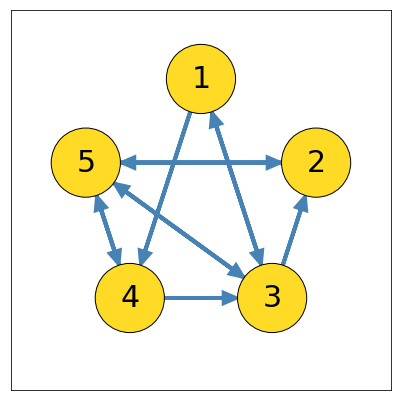

In [973]:
x = WebPages(N=5,edges=11, simple=True)
print(x.incidence)
f = x.plot_web()
r = x.simple_page_rank()
print(r)
sum(r)

In [954]:
sorted([float(r) for r in x.simple_page_rank()[0]])

[0.07692307692307682,
 0.07692307692307683,
 0.07692307692307711,
 0.15384615384615374,
 0.15384615384615383,
 0.23076923076923087,
 0.23076923076923106]

In [905]:
a[1] = 0

In [907]:
b = np.flatnonzero(a==1)

In [908]:
len(b) 

0

In [901]:
len(a)

4

In [1]:
#load SymPy module content
from sympy import *

#this makes printouts of matrices and vectors more readeable:
init_printing(use_latex='mathjax')

In [63]:
D = zeros(6, 5)
D[1, 0] = Rational(1,3)
D[2, 0] = Rational(1,3)
D[4, 0] = Rational(1,3)

D[3,1] = 1

D[0,2] = Rational(1,2)
D[1,2] = Rational(1,2)

D[0,3] = Rational(1,2)
D[4,3] = Rational(1,2)

D[2,4] = 1


D[5, :] = Matrix([[1, 1, 1, 1, 1]])
for i in range(5):
    D[i, i] = D[i, i] - 1
D

⎡-1   0   1/2  1/2  0 ⎤
⎢                     ⎥
⎢1/3  -1  1/2   0   0 ⎥
⎢                     ⎥
⎢1/3  0   -1    0   1 ⎥
⎢                     ⎥
⎢ 0   1    0   -1   0 ⎥
⎢                     ⎥
⎢1/3  0    0   1/2  -1⎥
⎢                     ⎥
⎣ 1   1    1    1   1 ⎦

In [64]:
b = Matrix([0,0,0,0,0, 1])

In [71]:
x = linsolve((D, b))

In [76]:
dir(x)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__or__',
 '__pow__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_accept_eval_derivative',
 '_args',
 '_assumptions',
 '_boundary',
 '_compare_pretty',
 '_complement',
 '_constructor_postprocessor_mapping',
 '_contains',
 '_elements',
 '_eval_Eq',
 '_eval_derivative_n_times',
 '_eval_evalf',
 '_eval_powerset',
 '_eval_rewrite',
 '_eval_subs',
 '_evalf',
 '_exec_constructor_postprocessors',
 '_explicit_class_assumptions',
 '_has',
 '_has_matcher',
 '_hashable_content',
 '_inf',
 '_infimum_key',
 '

In [79]:
x.args[0][0]

3/14

In [70]:
1/6

0.16666666666666666

In [88]:
D = zeros(5, 5)
D[1, 0] = Rational(1,3)
D[2, 0] = Rational(1,3)
D[4, 0] = Rational(1,3)

D[3,1] = 1

D[0,2] = Rational(1,2)
D[1,2] = Rational(1,2)

D[0,3] = Rational(1,2)
D[4,3] = Rational(1,2)

D[2,4] = 1

D.eigenvects()[0][2][0]/sum(D.eigenvects()[0][2][0])

⎡3/14⎤
⎢    ⎥
⎢4/21⎥
⎢    ⎥
⎢5/21⎥
⎢    ⎥
⎢4/21⎥
⎢    ⎥
⎣1/6 ⎦